# Text mining and Image Recognition: Hoja de Trabajo 2
#### Ruben Gonzalez 20003314

In [1]:
import cv2
import numpy as np
import sys

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def PlotImagen(nombre, grises = True):
    img = cv2.imread(nombre)
    if grises == True:
        #img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show

#### Problema 1:
Desarrolle una funcion que permita hacer la binarizacion de una imagen, para realizarlo puedeutilizar el enfoque que prefiera.

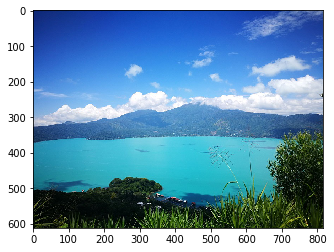

In [3]:
#Imagen a usar
PlotImagen('CoatepequeShort.jpg')

In [4]:
def binarizacion(nombre, umbral):

    img = cv2.imread(nombre+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    salida = np.zeros(img.shape)
    salida[img > umbral] = 255
    cv2.imwrite(nombre + '_Binarizado.jpg', salida)
    
    imagen_salida = cv2.imread(nombre + '_Binarizado.jpg')
    plt.title(nombre+'_Binarizado.jpg')
    plt.imshow(imagen_salida)
    plt.show()
    
    return salida

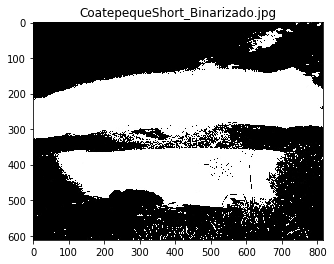

In [5]:
x1 = binarizacion('CoatepequeShort', 125)

#### Problema 2:
Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR, XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasarla imagen a escala de grises y luego binarizarla.

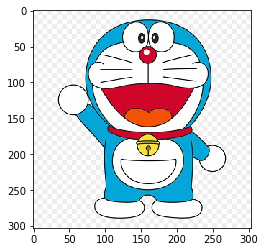

In [6]:
#imagenes a usar
PlotImagen('Doraemon.jpg')

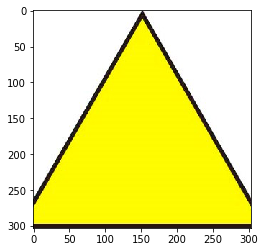

In [7]:
PlotImagen('triangulo.jpg')

In [8]:
def OperacionesImagenes(nombre1, nombre2):
    img1 = cv2.imread(nombre1+'.jpg')
    img2 = cv2.imread(nombre2+'.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    #Binarizar imagenes originales para operaciones logicas
    img1_bin = binarizacion(nombre1, 125)
    img2_bin = binarizacion(nombre2, 125)
    
    salidaSuma = np.zeros(img1.shape)
    salidaResta = np.zeros(img1.shape)
    salidaAND = np.zeros(img1.shape)
    salidaOR = np.zeros(img1.shape)
    salidaXOR = np.zeros(img1.shape)
    
    #Operaciones numericas
    salidaSuma = img1 + img2
    salidaResta = img1 - img2
    
    
    #Operaciones logicas
    salidaAND[((img1_bin == 255) & (img2_bin == 255))] = 255
    salidaOR[((img1_bin == 255) | (img2_bin == 255))] = 255
    salidaXOR[((img1_bin == 255) ^ (img2_bin == 255))] = 255
      
    cv2.imwrite('P2-Suma.jpg', salidaSuma)
    cv2.imwrite('P2-Resta.jpg', salidaResta)
    cv2.imwrite('P2-AND.jpg', salidaAND)
    cv2.imwrite('P2-OR.jpg', salidaOR)
    cv2.imwrite('P2-XOR.jpg', salidaXOR)
    
    return salidaSuma, salidaResta, salidaAND, salidaOR, salidaXOR

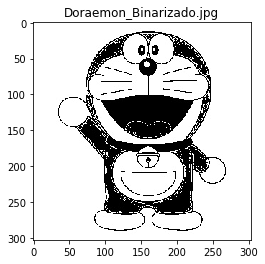

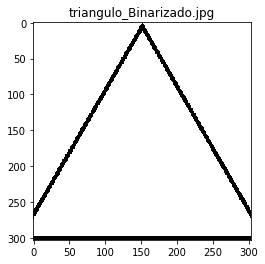

In [9]:
Suma, Resta, R_And, R_or, R_xor = OperacionesImagenes('Doraemon','triangulo')

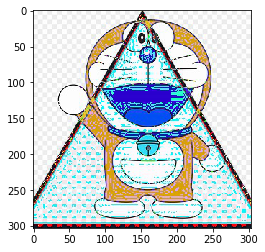

In [10]:
PlotImagen('P2-Suma.jpg')

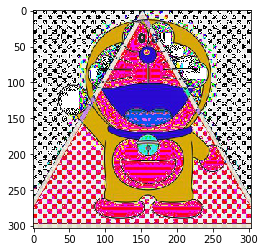

In [11]:
PlotImagen('P2-Resta.jpg')

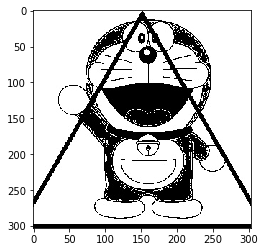

In [12]:
PlotImagen('P2-AND.jpg')

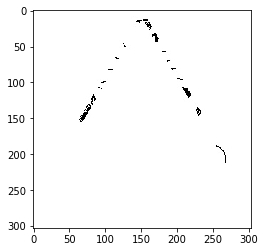

In [13]:
PlotImagen('P2-OR.jpg')

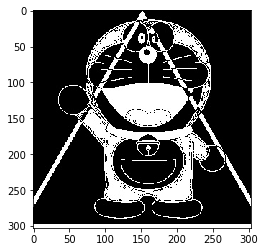

In [14]:
PlotImagen('P2-XOR.jpg')

#### Problema 3:
Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

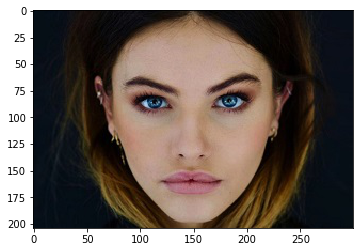

In [15]:
#Imagen a usar
PlotImagen('rostro.jpg')

In [16]:
#La funcion muestra unicamente 3 iteraciones pero ejemplifica lo que se desea
def Imagen3D(nombre,elevacion,nivel):
    img = cv2.imread(nombre+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    xx, yy = np.mgrid[0:img.shape[0], 0:img.shape[1]]
    fig = plt.figure(figsize = (20, 20))
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.plot_surface(xx, yy, img ,rstride=1, cstride=1, cmap=plt.cm.gray,linewidth=2)
    ax.view_init(elevacion, nivel)
    
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.plot_surface(xx, yy, img ,rstride=1, cstride=1, cmap=plt.cm.gray,linewidth=2)
    ax.view_init(elevacion-10, nivel)
    
    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.plot_surface(xx, yy, img ,rstride=1, cstride=1, cmap=plt.cm.gray,linewidth=2)
    ax.view_init(elevacion-20, nivel)
    
    plt.show()

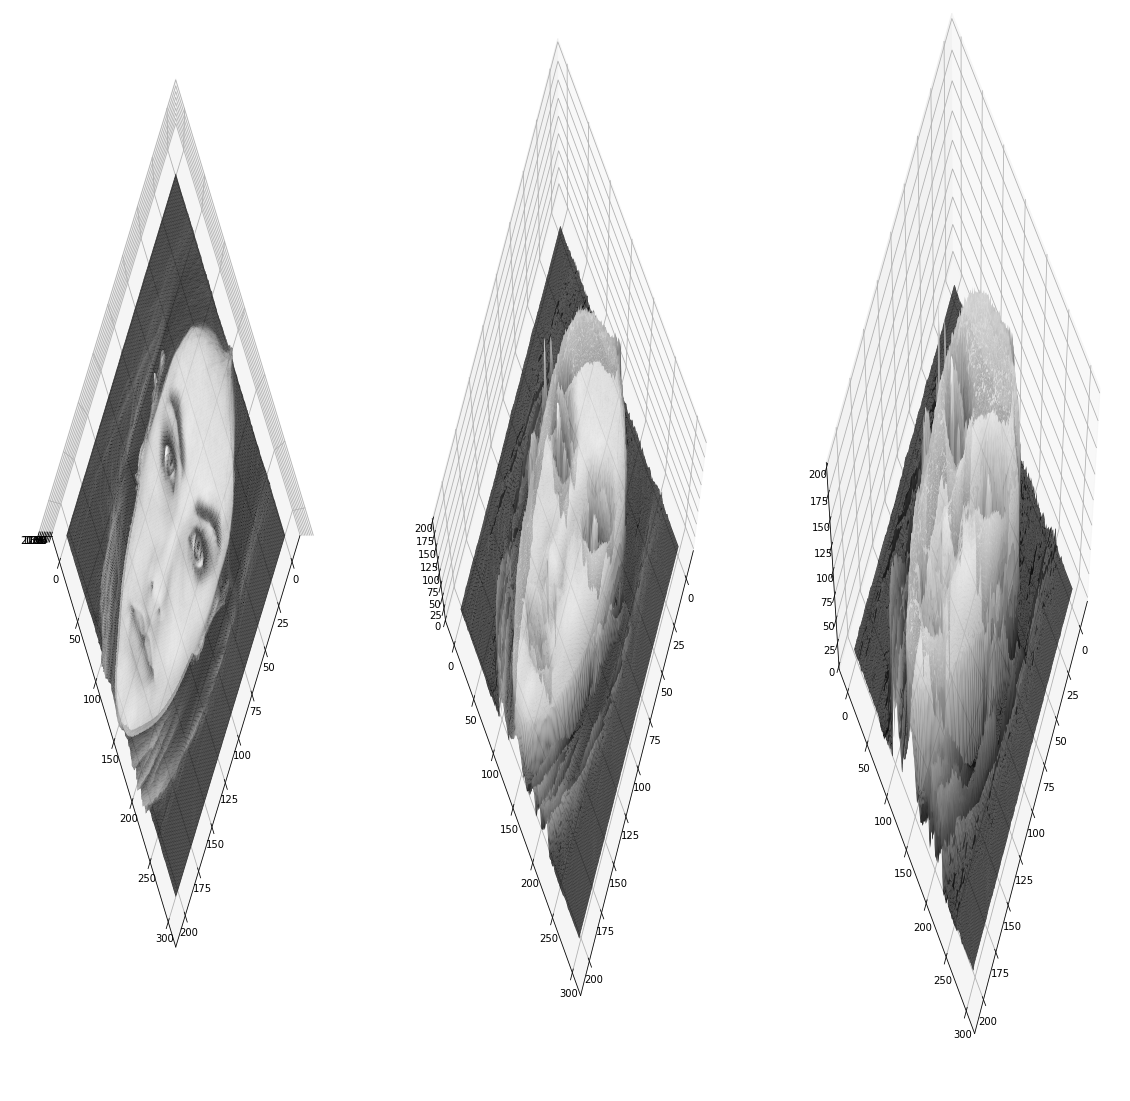

In [17]:
Imagen3D('rostro',90,40)

#### Problema 4:
Implemente una función para cada una de las trasformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

In [18]:
def Trans_Negativa(nombre):
    img = cv2.imread(nombre+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #salida de datos
    salida = 255 - img
    cv2.imwrite(nombre + "_Negativa.jpg", salida)
    
    return salida

In [19]:
#usamos la imagen del problema anterior
tNeg=Trans_Negativa('rostro')

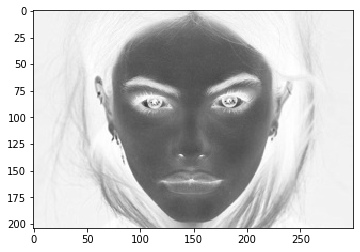

In [20]:
PlotImagen('rostro_Negativa.jpg')

In [21]:
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

In [22]:
def Trans_Lineal(nombre):
    img = cv2.imread(nombre+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    # Define parameters
    r1 = 70
    s1 = 0
    r2 = 140
    s2 = 255

    # Vectorizamos la funcion 
    pixelVal_vec = np.vectorize(pixelVal) 

    # Applicando contraste 
    salida = pixelVal_vec(img, r1, s1, r2, s2) 

    #Guardar datos
    cv2.imwrite(nombre + '_Lineal.jpg', salida) 

In [23]:
tLineal = Trans_Lineal('rostro')

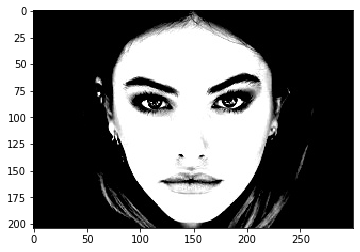

In [24]:
PlotImagen('rostro_Lineal.jpg')

In [25]:
def Trans_Log(nombre):
    img = cv2.imread(nombre+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Definiendo constante C
    C = 255 / np.log1p(img.max())
    
    #salida de datos
    salida = C * np.log1p(np.double(img))
    cv2.imwrite(nombre + '_Logaritmica.jpg', salida)
    
    return salida

In [26]:
tLog= Trans_Log('rostro')

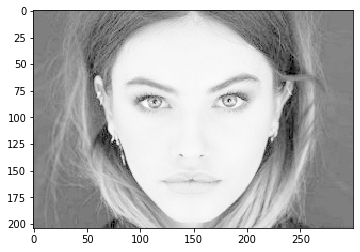

In [27]:
PlotImagen('rostro_Logaritmica.jpg')

In [28]:
def Trans_Exp(nombre, gamma):
    img = cv2.imread(nombre+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Definiendo la constante
    C = 255 / np.power(255, gamma)
    
    #salida de datos
    salida =  C * np.power(img, gamma)
    cv2.imwrite(nombre + '_Exponencial.jpg', salida)
    
    return salida

In [29]:
tExp = Trans_Exp('rostro',0.95)

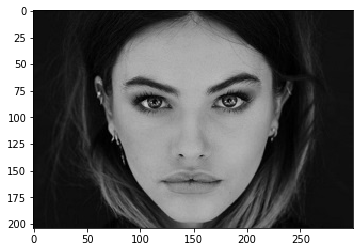

In [30]:
PlotImagen('rostro_Exponencial.jpg')